<a href="https://colab.research.google.com/github/ThierrryScotto/AtividadePratica_KNN/blob/main/Atividade_pr%C3%A1tica_Algoritmo_k_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Dataset

Obter os datasets

In [61]:
def get_dataset(url):
    df = pd.read_csv(url, delimiter='\t')

    return df


#k-Nearest Neighbors (KNN)

In [62]:
def display_knn_results(test_label, predicted):
    # Print accuracy score
    accuracy = accuracy_score(test_label, predicted)
    print(f'Accuracy: {accuracy:.2f}')

    cm = confusion_matrix(test_label, predicted)

    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [63]:
def model_predict(k_param, train, labels, test):
    results = []
    for k in k_param:
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(train, labels)

        distances, indices = model.kneighbors(test)

        results.append({
            "k": k,
            "predicted": model.predict(test),
            "distances_test": distances,
            "indices_test": indices
        })

    return results

# Experimentos

## A)
Treine modelos usando o algoritmo KNN para o conjunto de dados
Dados_Originais_2Features (não normalizados), variando o valor de k
(número de vizinhos mais próximos) entre 1, 3, 5, 7. Para cada modelo treinado,
avalie seu desempenho nos dados de teste, reportando a acurácia. Repita o
mesmo procedimento com os dados Dados_Normalizados_2Features.
Compare as acurácias obtidas nos modelos treinados a partir destes dois
conjuntos de dados, analisando se a normalização impactou de alguma forma
os resultados. Observe se a mudança no valor de k causou algum impacto no
desempenho destes modelos (com e sem normalização dos dados) e, em caso
positivo, se as variações no desempenho são as mesmas entre os modelos
treinados com mesmo k, mas com dados distintos (dados originais e dados
normalizados). [Responda a pergunta 1 do questionário]

#### functions

In [64]:
def scatter_plot(df_train, df_test, test_indice, k_neighbors_indices):
    indices              = pd.concat([df_train['ID'], df_test['ID']], ignore_index=True)
    total_sulfur_dioxide = pd.concat([df_train['total.sulfur.dioxide'], df_test['total.sulfur.dioxide']], ignore_index=True)
    citric_acid          = pd.concat([df_train['citric.acid'], df_test['citric.acid']], ignore_index=True)

    # Plot do gráfico de dispersão
    plt.figure(figsize=(10, 8))
    plt.scatter(total_sulfur_dioxide, citric_acid, c='black', edgecolors='gray', label='Pontos')

    # Destacar dados de test
    for i in test_indice:
        plt.scatter(total_sulfur_dioxide[i], citric_acid[i], c='red', edgecolors='black', s=100, label=f'{indices[i]}', marker='s')
        plt.text(total_sulfur_dioxide[i], citric_acid[i], f'N{i+1}', color='red', fontsize=12)

    colors = ['yellow', 'lime', 'lightseagreen', 'dodgerblue']
    count = 0
    # Destacar os K-vizinhos
    for i_indices in k_neighbors_indices:
        for values in range(len(i_indices)):
            plt.scatter(total_sulfur_dioxide[i_indices[values]], citric_acid[i_indices[values]], c=colors[count], edgecolors=colors[count], s=100, label=f'{indices[i_indices[values]]}', marker="*")
        count += 1

    # Adicionar rótulos aos pontos
    for i, label in enumerate(indices):
        plt.text(total_sulfur_dioxide[i], citric_acid[i], label, fontsize=12, ha='right')

    # Configurações do gráfico
    plt.xlabel('Total Sulfur Dioxide')
    plt.ylabel('Citric Acid')
    plt.title('Distribuição de Pontos e K-Vizinhos Mais Próximos')
    plt.grid(True)
    plt.show()


In [65]:
def show_results(df_test, y_predicted):
    for k in y_predicted:
        print(f"k=",k.get('k'))
        display_knn_results(df_test, k.get('predicted'))
        print("\n")

In [66]:
features = ['total.sulfur.dioxide', 'citric.acid']

###Dados originais - não normalizados

In [67]:
TestingData_2F_Original_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Originais_2Features/TestingData_2F_Original.txt'
TrainingData_2F_Original_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Originais_2Features/TrainingData_2F_Original.txt'

In [68]:
df_train_original = get_dataset(TrainingData_2F_Original_url)
df_test_original = get_dataset(TestingData_2F_Original_url)

In [69]:
df_train_original.head(5)

,ID,total.sulfur.dioxide,citric.acid,class
0,T1,90.0,0.38,0
1,T2,110.0,0.30,0
2,T3,61.0,0.41,0
3,T4,77.5,0.00,0
4,T5,39.0,0.35,0


In [70]:
df_test_original

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,26,0.00,0
1,N2,72,0.30,0
2,N3,13,0.50,1
3,N4,32,0.68,1


In [71]:
train_label_original = df_train_original['class']
test_label_original = df_test_original['class']

In [72]:
df_train_original.columns

Index(['ID', 'total.sulfur.dioxide', 'citric.acid', 'class'], dtype='object')

In [73]:
k = [1, 3, 5, 7]

y_predicted = model_predict(k, df_train_original[features], df_train_original['class'], df_test_original[features])

k= 1
Accuracy: 0.75


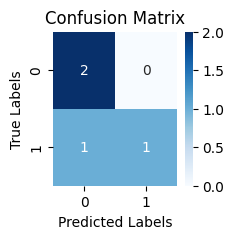



k= 3
Accuracy: 0.50


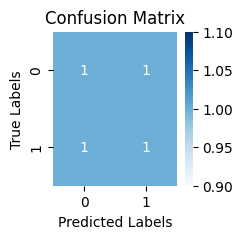



k= 5
Accuracy: 0.25


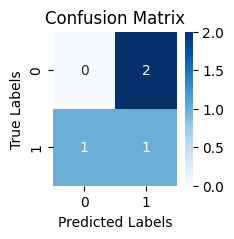



k= 7
Accuracy: 0.25


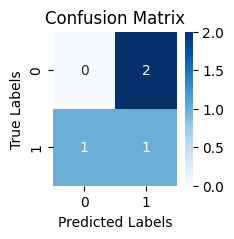

In [74]:
show_results(df_test_original['class'], y_predicted)

k =  1


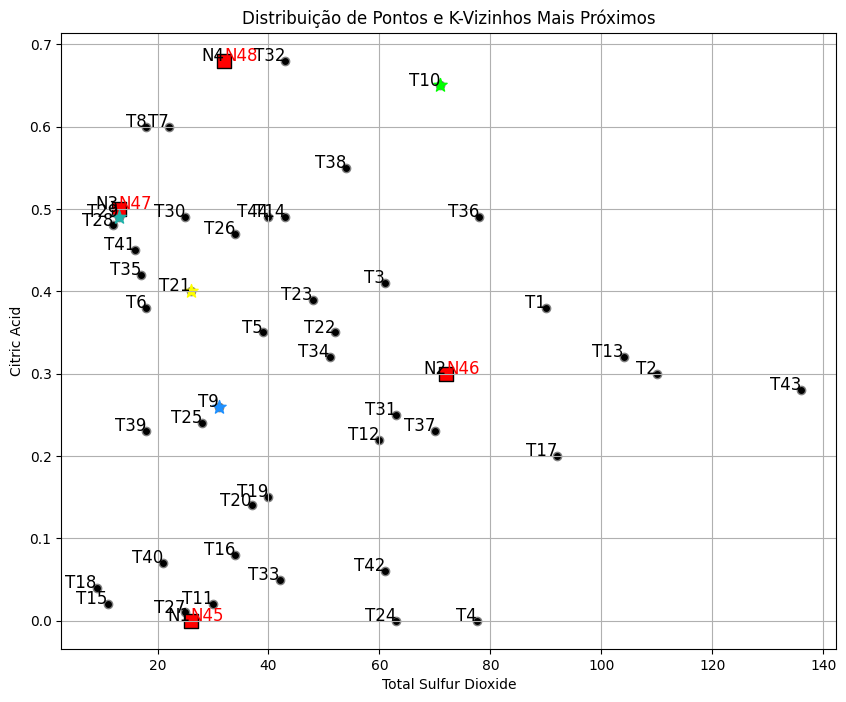



k =  3


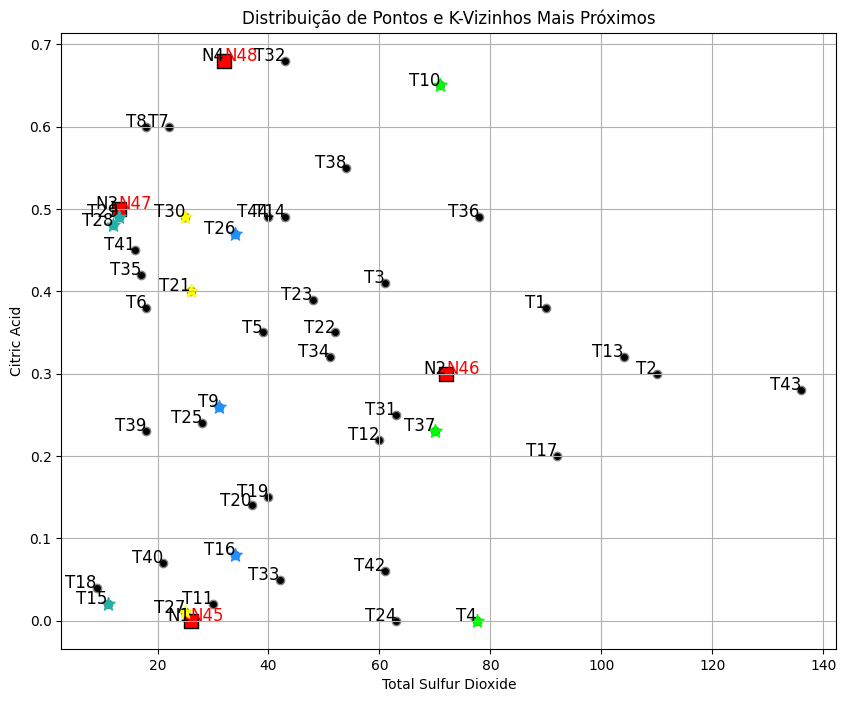



k =  5


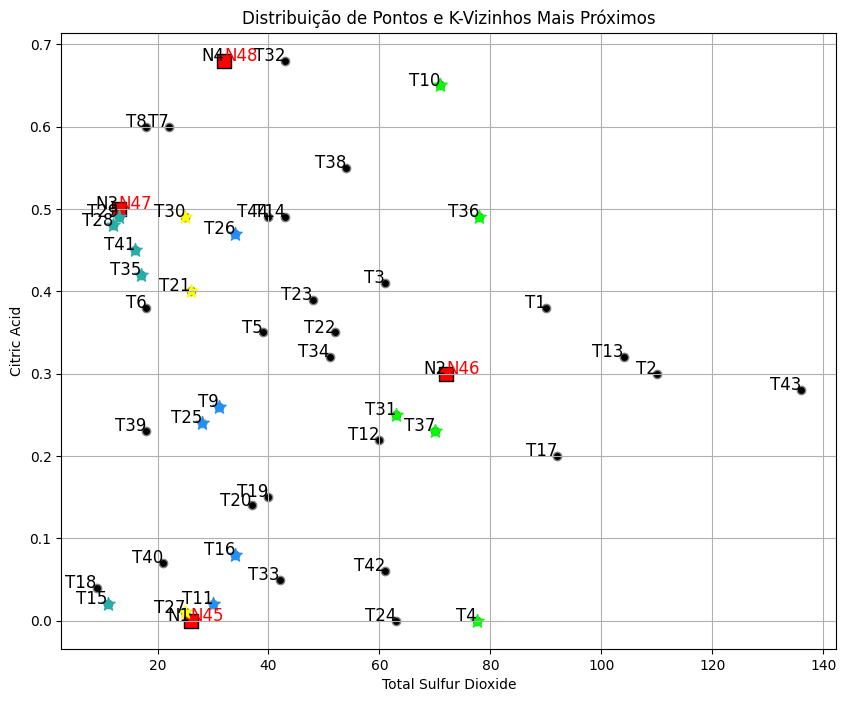



k =  7


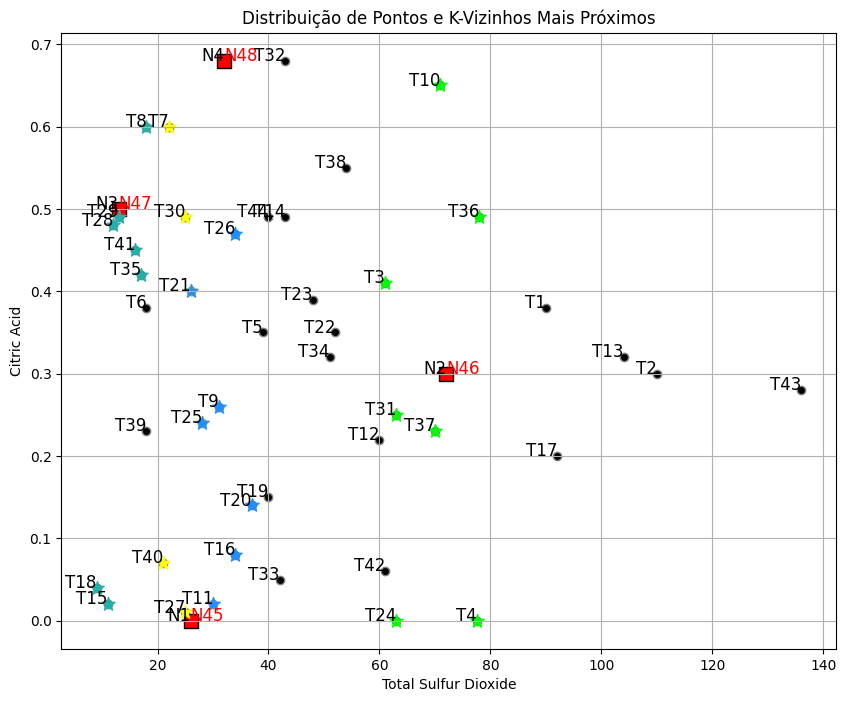

In [75]:
test_indices = [44, 45, 46, 47]

for results in y_predicted:
    print(f"k = ",results.get('k'))
    scatter_plot(df_train_original, df_test_original, test_indices, results.get('indices_test'))
    print("\n")

In [76]:
y_predicted[2].get('indices_test')

array([[20, 26, 29, 24, 10],
       [ 9, 36,  3, 35, 30],
       [28, 27, 14, 40, 34],
       [ 8, 25, 15, 10, 24]])

###Dados normalizados

In [77]:
TrainingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TrainingData_2F_Norm.txt'
TestingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TestingData_2F_Norm.txt'

In [78]:
df_train_normalized = get_dataset(TrainingData_2F_normalized_url)
df_test_normalized = get_dataset(TestingData_2F_normalized_url)

In [79]:
df_train_normalized.head(5)

,ID,total.sulfur.dioxide,citric.acid,class
0,T1,0.638,0.559,0
1,T2,0.795,0.441,0
2,T3,0.409,0.603,0
3,T4,0.539,0.000,0
4,T5,0.236,0.515,0


In [80]:
df_test_normalized

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,0.134,0.000,0
1,N2,0.496,0.441,0
2,N3,0.031,0.735,1
3,N4,0.181,1.000,1


In [81]:
k = [1, 3, 5, 7]

y_predicted = model_predict(k, df_train_normalized[features], df_train_normalized['class'], df_test_normalized[features])

k= 1
Accuracy: 0.50


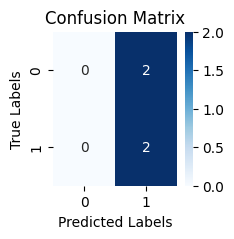



k= 3
Accuracy: 0.25


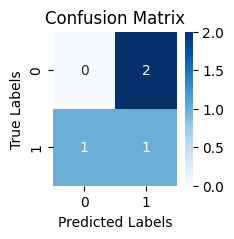



k= 5
Accuracy: 0.75


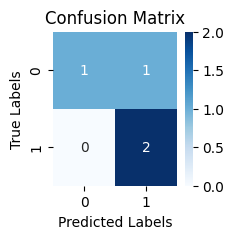



k= 7
Accuracy: 1.00


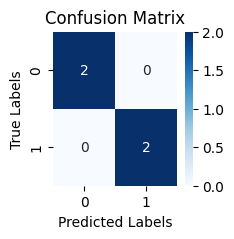

In [82]:
show_results(df_test_normalized['class'], y_predicted)

k =  1


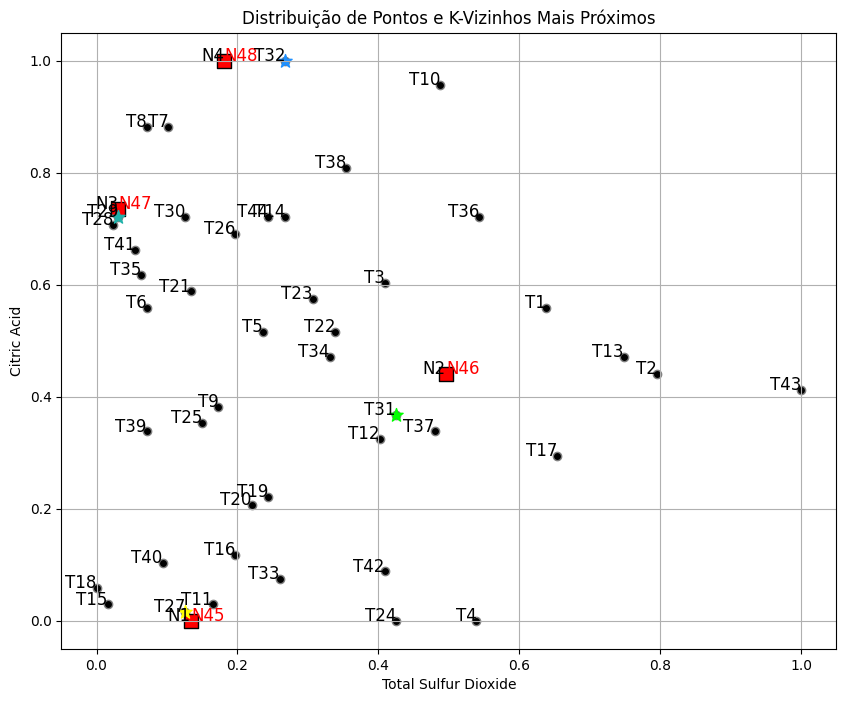



k =  3


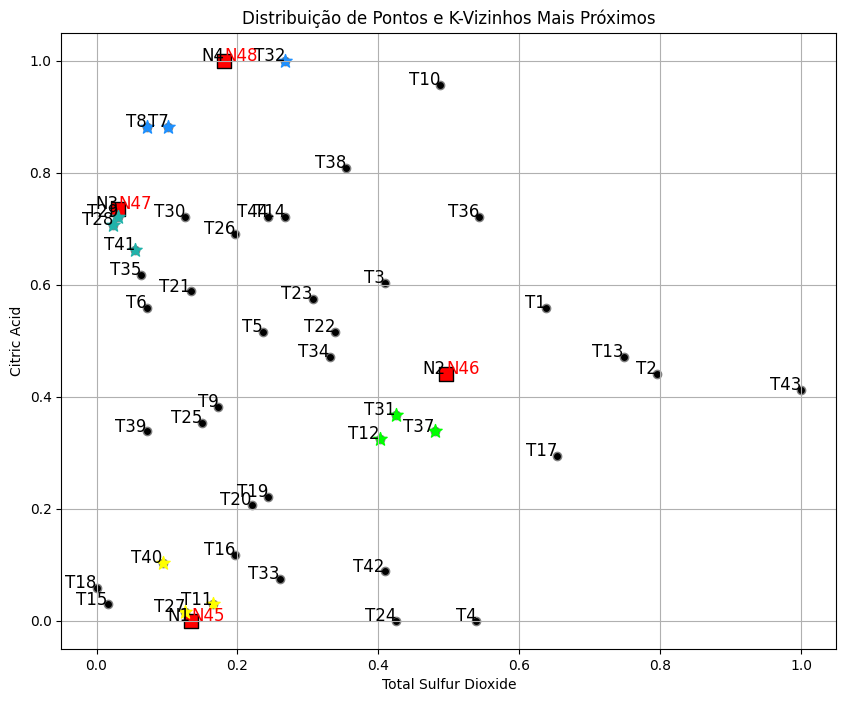



k =  5


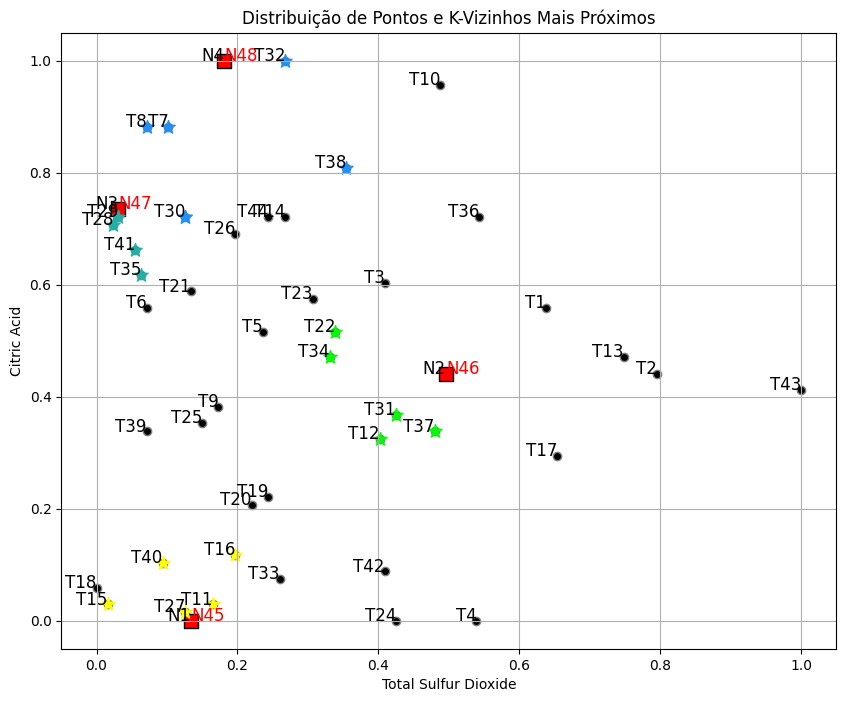



k =  7


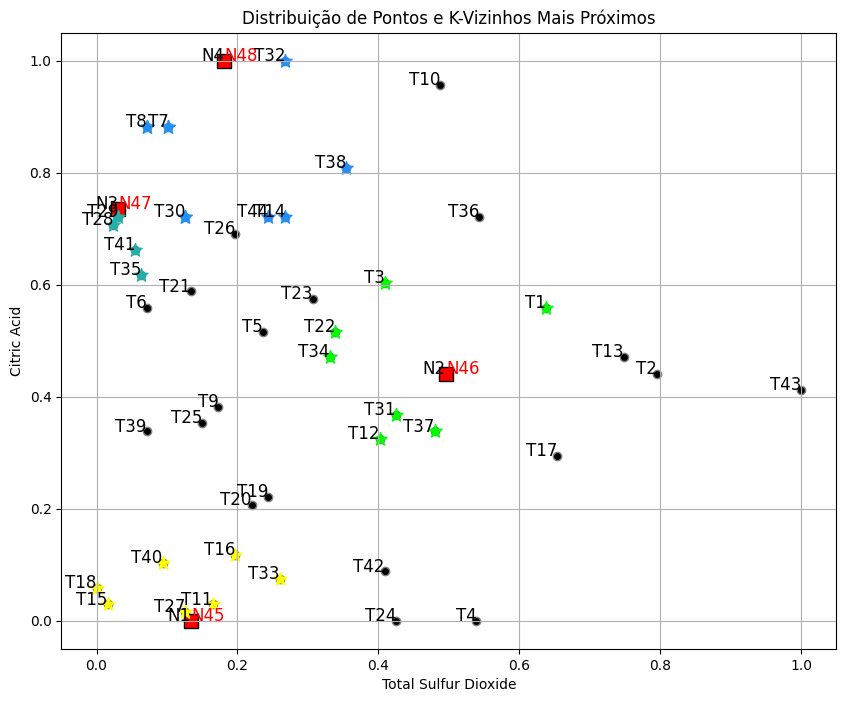

In [83]:
test_indices = [44, 45, 46, 47]

for results in y_predicted:
    print(f"k = ",results.get('k'))
    scatter_plot(df_train_normalized, df_test_normalized, test_indices, results.get('indices_test'))
    print("\n")

##B)
Considerando o modelo treinado com k=5 utilizando dados não normalizados
e com 2 atributos, verifique quem são os k vizinhos mais próximos da instância
de teste N1 (liste os respectivos IDs). Verifique como estes vizinhos estão
dispostos no espaço de entrada em relação à instância de teste N1 e aos eixos
x e y. Após tirar suas conclusões, analise se as mesmas se aplicam às
instâncias de teste N2, N3 e N4. [Responda as perguntas 2 e 3 do
questionário]

<h3> Os IDs são: T28, T27, T14, T40, T34<h3>

##C)
Treine dois modelos usando o algoritmo KNN com k=5 para os datasets
Dados_Normalizados_2Features e Dados_Normalizados_11Features.
Aplique os modelos treinados nos respectivos dados de teste, verificando os
k-vizinhos mais próximos e a classe prevista para a instância N4. Faça
perturbações no valor do atributo “citric acid” para a instância N4, substituindo
o valor original (1.0) por 0.3 e posteriormente por 0.85 (ou seja, gere duas
novas instâncias sintéticas com esta alteração). Repita a classificação destas
instâncias sintéticas com os dois modelos (isto é, modelo baseado em 2
atributos e em 11 atributos). Compare os resultados, analisando como a
alteração de um atributo impactou o cálculo das distâncias euclidianas e a
seleção dos k-vizinhos mais próximos em cada caso. [Responda a pergunta 4
do questionário]

###Dados normalizados 11 features e  2 features | test 1
<bold>Treine dois modelos usando o algoritmo KNN com k=5 para os datasets Dados_Normalizados_2Features e Dados_Normalizados_11Features. Aplique os modelos treinados nos respectivos dados de teste, verificando os k-vizinhos mais próximos e a classe prevista para a instância N4<bold>

In [84]:
TrainingData_11f_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_11Features/TrainingData_11F_Norm.txt'
TestingData_11f_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_11Features/TestingData_11F_Norm.txt'

TrainingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TrainingData_2F_Norm.txt'
TestingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TestingData_2F_Norm.txt'

In [85]:
train_11F_Norm = get_dataset(TrainingData_11f_normalized_url)
test_11F_Norm = get_dataset(TestingData_11f_normalized_url)

In [86]:
train_2F_Norm = get_dataset(TrainingData_2F_normalized_url)
test_2F_Norm = get_dataset(TestingData_2F_normalized_url)

In [87]:
train_11F_Norm.head(5)

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
0,T1,0.449,0.278,0.559,0.015,0.985,0.489,0.638,0.769,0.293,0.150,0.000,0
1,T2,0.168,0.685,0.441,0.455,0.220,0.340,0.795,0.769,0.493,0.490,0.266,0
2,T3,0.439,0.222,0.603,0.121,0.333,0.149,0.409,0.673,0.373,0.052,0.156,0
3,T4,0.131,0.741,0.000,0.424,0.409,1.000,0.539,0.406,0.360,0.020,0.156,0
4,T5,0.168,0.352,0.515,0.015,0.371,0.255,0.236,0.459,0.547,0.085,0.109,0


In [88]:
test_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
0,N1,0.075,0.500,0.000,-0.015,0.136,0.234,0.134,0.294,0.573,0.020,0.156,0
1,N2,0.187,0.333,0.441,0.091,0.333,0.660,0.496,0.551,0.680,0.065,0.141,0
2,N3,0.458,0.278,0.735,0.136,0.492,0.043,0.031,0.493,0.387,0.150,0.484,1
3,N4,0.243,0.463,1.000,0.030,2.848,0.213,0.181,0.506,0.213,0.418,0.094,1


In [89]:
features_11F = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features_2F = ['total.sulfur.dioxide', 'citric.acid']

In [90]:
k = [5]

predicted_11F = model_predict(k, train_11F_Norm[features_11F], train_11F_Norm['class'], test_11F_Norm[features_11F])

k= 5
Accuracy: 0.75


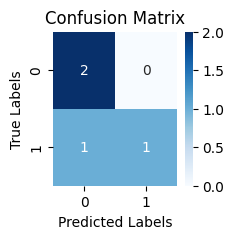

In [91]:
show_results(test_11F_Norm['class'], predicted_11F)

In [92]:
k = [5]

predicted_2F = model_predict(k, train_2F_Norm[features_2F], train_2F_Norm['class'], test_2F_Norm[features_2F])

k= 5
Accuracy: 0.75


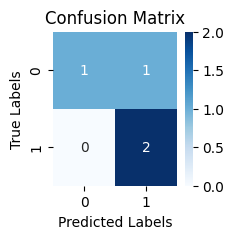

In [93]:
show_results(test_2F_Norm['class'], predicted_2F)

k =  5


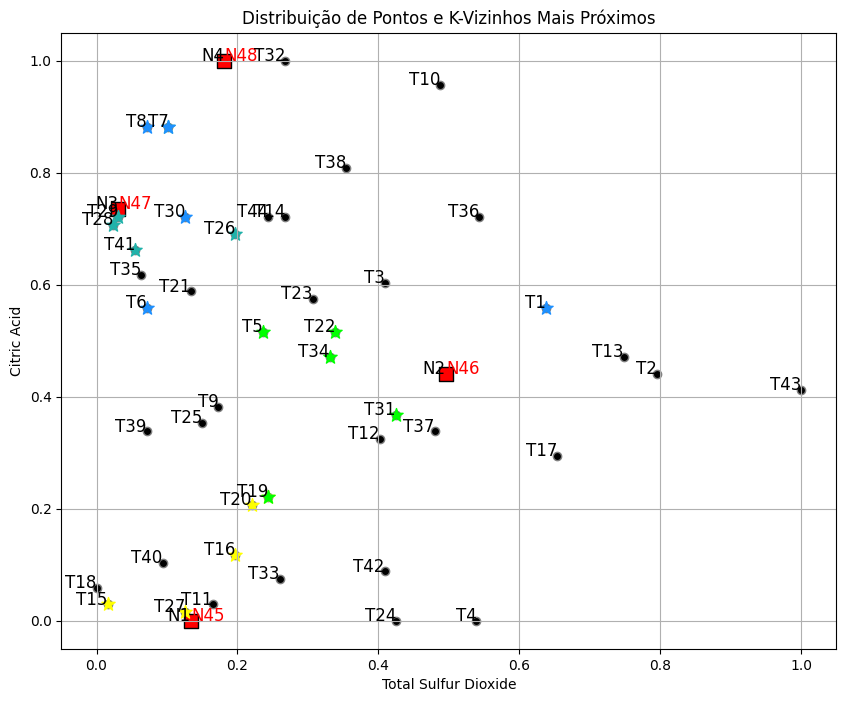

In [94]:
test_indices = [44, 45, 46, 47]

for results in predicted_11F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_11F_Norm, test_11F_Norm, test_indices, results.get('indices_test'))
    print("\n")

k =  5


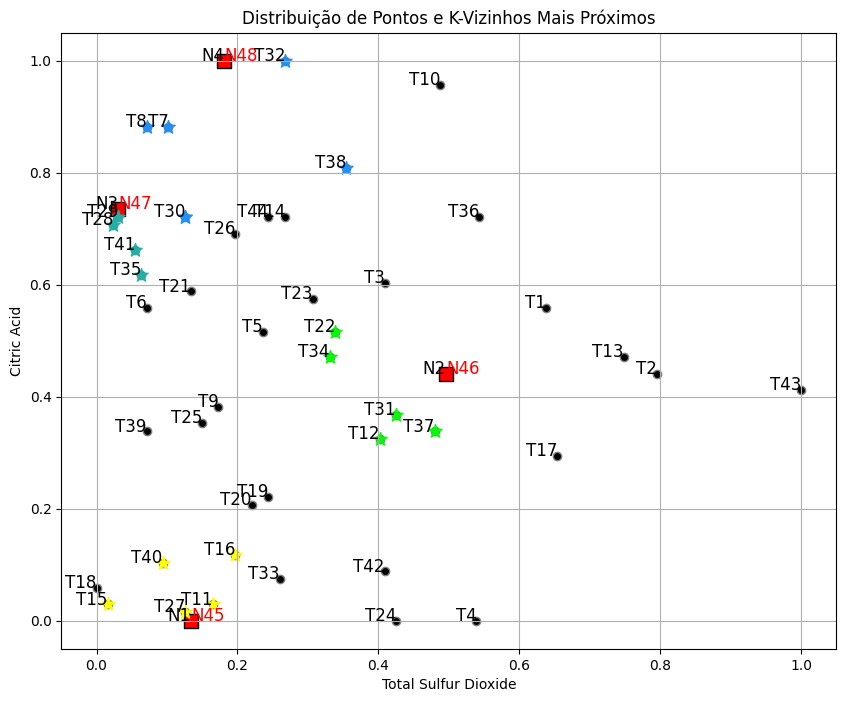

In [95]:
test_indices = [44, 45, 46, 47]

for results in predicted_2F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_2F_Norm, test_2F_Norm, test_indices, results.get('indices_test'))
    print("\n")

<h3>As instâncias mais próximos são <b><b><h3>

In [96]:
predicted_11F[0].get('indices_test')

array([[15, 26, 18, 19, 14],
       [30,  4, 21, 18, 33],
       [25, 27,  6, 28, 40],
       [29,  0,  7,  6,  5]])

In [97]:
predicted_2F[0].get('indices_test')

array([[26, 10, 39, 14, 15],
       [30, 36, 11, 33, 21],
       [28, 27, 40, 29, 34],
       [31,  6,  7, 37, 29]])

<h3>classe prevista para N4 para o dataset 11F é <b>0</b> e para o dataset 2F é <b>1</b> em ambos os datasets<h3>

In [98]:
predicted_11F[0].get('predicted')[3]

0

In [99]:
predicted_2F[0].get('predicted')[3]

1

###Dados normalizados 11 features e  2 features | test 2
<bold>Faça
perturbações no valor do atributo “citric acid” para a instância N4, substituindo o valor original (1.0) por 0.3 e posteriormente por 0.85 (ou seja, gere duas novas instâncias sintéticas com esta alteração). Repita a classificação destas instâncias sintéticas com os dois modelos (isto é, modelo baseado em 2 atributos e em 11 atributos). Compare os resultados, analisando como a alteração de um atributo impactou o cálculo das distâncias euclidianas e a seleção dos k-vizinhos mais próximos em cada caso. [Responda a pergunta 4
do questionário]<bold>

In [101]:
TrainingData_11f_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_11Features/TrainingData_11F_Norm.txt'
TestingData_11f_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_11Features/TestingData_11F_Norm.txt'

TrainingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TrainingData_2F_Norm.txt'
TestingData_2F_normalized_url = 'https://raw.githubusercontent.com/ThierrryScotto/AtividadePratica_KNN/refs/heads/main/Dados_Normalizados_2Features/TestingData_2F_Norm.txt'

In [102]:
train_11F_Norm = get_dataset(TrainingData_11f_normalized_url)
test_11F_Norm = get_dataset(TestingData_11f_normalized_url)

In [103]:
train_2F_Norm = get_dataset(TrainingData_2F_normalized_url)
test_2F_Norm = get_dataset(TestingData_2F_normalized_url)

In [104]:
test_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
0,N1,0.075,0.500,0.000,-0.015,0.136,0.234,0.134,0.294,0.573,0.020,0.156,0
1,N2,0.187,0.333,0.441,0.091,0.333,0.660,0.496,0.551,0.680,0.065,0.141,0
2,N3,0.458,0.278,0.735,0.136,0.492,0.043,0.031,0.493,0.387,0.150,0.484,1
3,N4,0.243,0.463,1.000,0.030,2.848,0.213,0.181,0.506,0.213,0.418,0.094,1


In [105]:
test_2F_Norm

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,0.134,0.000,0
1,N2,0.496,0.441,0
2,N3,0.031,0.735,1
3,N4,0.181,1.000,1


### Alteração 0.3

**Alterando os valor de citric acid em ambos datasets**

In [113]:
test_2F_Norm.loc[test_2F_Norm['ID'] == "N4", 'citric.acid'] = 0.3
test_11F_Norm.loc[test_11F_Norm['ID'] == "N4", 'citric.acid'] = 0.3

In [115]:
test_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
0,N1,0.075,0.500,0.000,-0.015,0.136,0.234,0.134,0.294,0.573,0.020,0.156,0
1,N2,0.187,0.333,0.441,0.091,0.333,0.660,0.496,0.551,0.680,0.065,0.141,0
2,N3,0.458,0.278,0.735,0.136,0.492,0.043,0.031,0.493,0.387,0.150,0.484,1
3,N4,0.243,0.463,0.300,0.030,2.848,0.213,0.181,0.506,0.213,0.418,0.094,1


In [114]:
test_2F_Norm

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,0.134,0.000,0
1,N2,0.496,0.441,0
2,N3,0.031,0.735,1
3,N4,0.181,0.300,1


In [116]:
features_11F = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features_2F = ['total.sulfur.dioxide', 'citric.acid']

In [117]:
k = [5]

predicted_11F = model_predict(k, train_11F_Norm[features_11F], train_11F_Norm['class'], test_11F_Norm[features_11F])

k= 5
Accuracy: 0.75


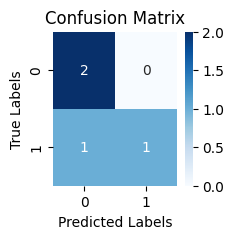

In [118]:
show_results(test_11F_Norm['class'], predicted_11F)

In [119]:
k = [5]

predicted_2F = model_predict(k, train_2F_Norm[features_2F], train_2F_Norm['class'], test_2F_Norm[features_2F])

k= 5
Accuracy: 0.50


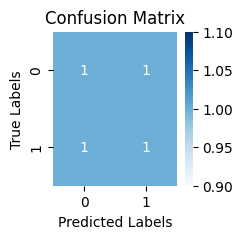

In [120]:
show_results(test_2F_Norm['class'], predicted_2F)

k =  5


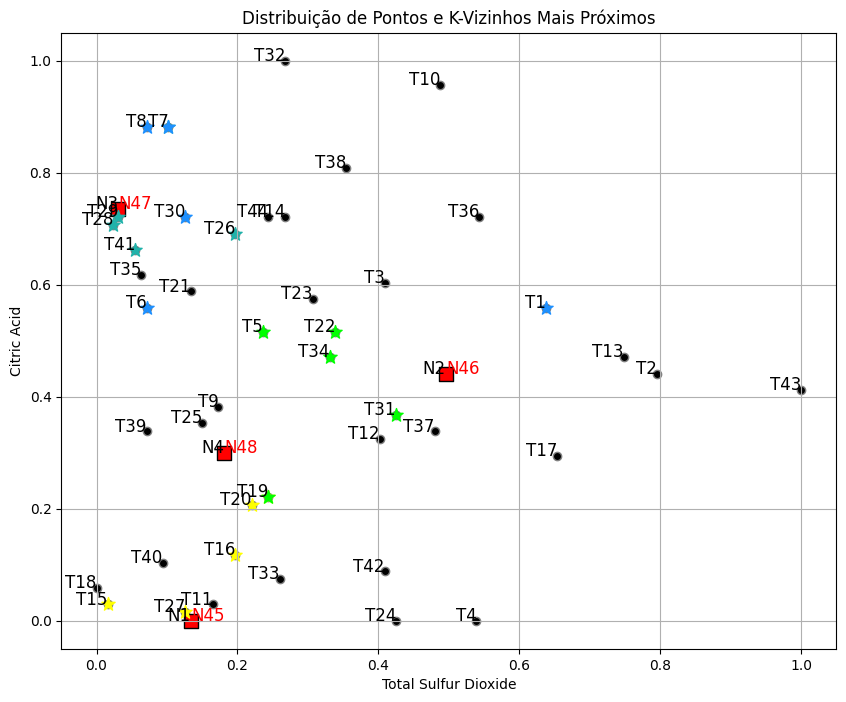

In [121]:
test_indices = [44, 45, 46, 47]

for results in predicted_11F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_11F_Norm, test_11F_Norm, test_indices, results.get('indices_test'))
    print("\n")

k =  5


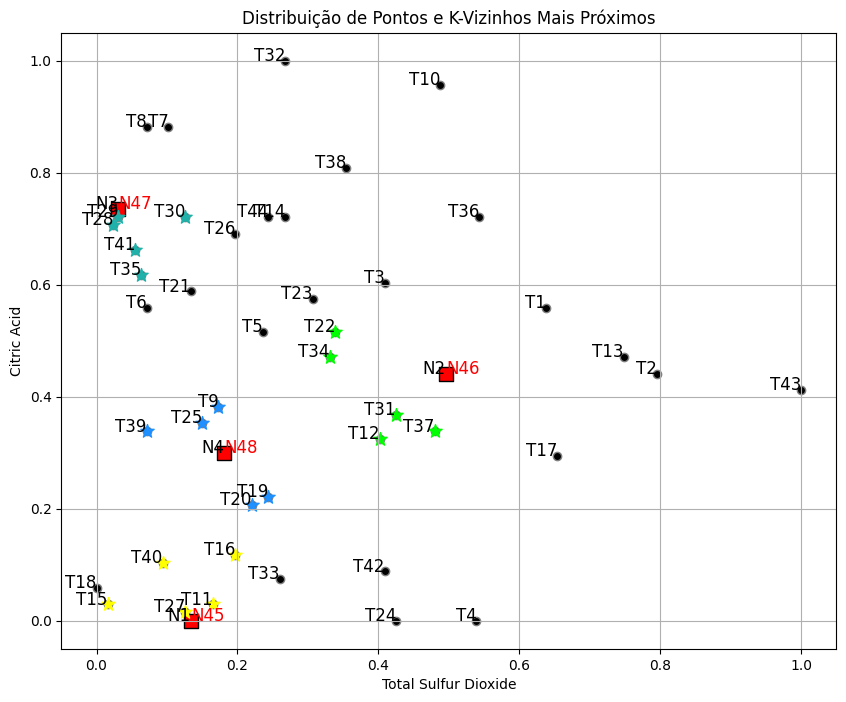

In [122]:
test_indices = [44, 45, 46, 47]

for results in predicted_2F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_2F_Norm, test_2F_Norm, test_indices, results.get('indices_test'))
    print("\n")

<h3>As instâncias mais próximos são <b><b><h3>

In [123]:
predicted_11F[0].get('indices_test')

array([[15, 26, 18, 19, 14],
       [30,  4, 21, 18, 33],
       [25, 27,  6, 28, 40],
       [29,  0,  7,  5,  6]])

In [124]:
predicted_2F[0].get('indices_test')

array([[26, 10, 39, 14, 15],
       [30, 36, 11, 33, 21],
       [28, 27, 40, 29, 34],
       [24,  8, 18, 19, 38]])

<h3>classe prevista para N4 para o dataset 11F é <b>0</b> e para o dataset 2F é <b>1</b> em ambos os datasets<h3>

In [125]:
predicted_11F[0].get('predicted')[3]

0

In [126]:
predicted_2F[0].get('predicted')[3]

0

### Alteração 0.85

**Alterando os valor de citric acid em ambos datasets**

In [128]:
test_2F_Norm.loc[test_2F_Norm['ID'] == "N4", 'citric.acid'] = 0.85
test_11F_Norm.loc[test_11F_Norm['ID'] == "N4", 'citric.acid'] = 0.85

In [129]:
test_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
0,N1,0.075,0.500,0.000,-0.015,0.136,0.234,0.134,0.294,0.573,0.020,0.156,0
1,N2,0.187,0.333,0.441,0.091,0.333,0.660,0.496,0.551,0.680,0.065,0.141,0
2,N3,0.458,0.278,0.735,0.136,0.492,0.043,0.031,0.493,0.387,0.150,0.484,1
3,N4,0.243,0.463,0.850,0.030,2.848,0.213,0.181,0.506,0.213,0.418,0.094,1


In [130]:
test_2F_Norm

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,0.134,0.000,0
1,N2,0.496,0.441,0
2,N3,0.031,0.735,1
3,N4,0.181,0.850,1


In [131]:
features_11F = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features_2F = ['total.sulfur.dioxide', 'citric.acid']

In [132]:
k = [5]

predicted_11F = model_predict(k, train_11F_Norm[features_11F], train_11F_Norm['class'], test_11F_Norm[features_11F])

k= 5
Accuracy: 0.75


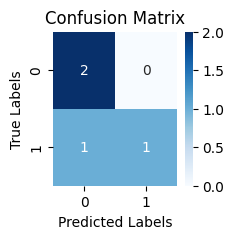

In [133]:
show_results(test_11F_Norm['class'], predicted_11F)

In [134]:
k = [5]

predicted_2F = model_predict(k, train_2F_Norm[features_2F], train_2F_Norm['class'], test_2F_Norm[features_2F])

k= 5
Accuracy: 0.50


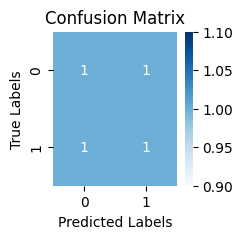

In [135]:
show_results(test_2F_Norm['class'], predicted_2F)

k =  5


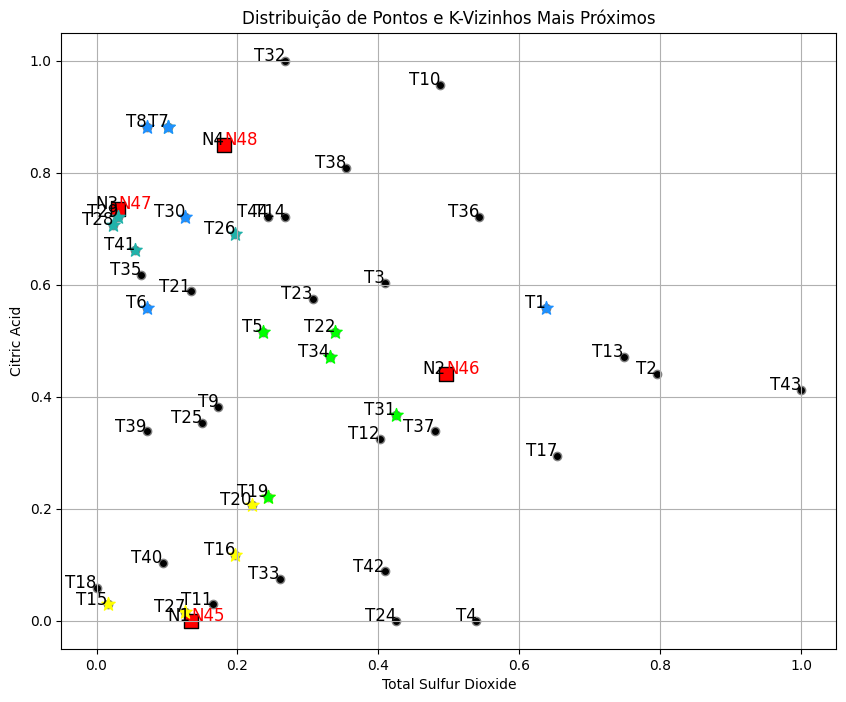

In [136]:
test_indices = [44, 45, 46, 47]

for results in predicted_11F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_11F_Norm, test_11F_Norm, test_indices, results.get('indices_test'))
    print("\n")

k =  5


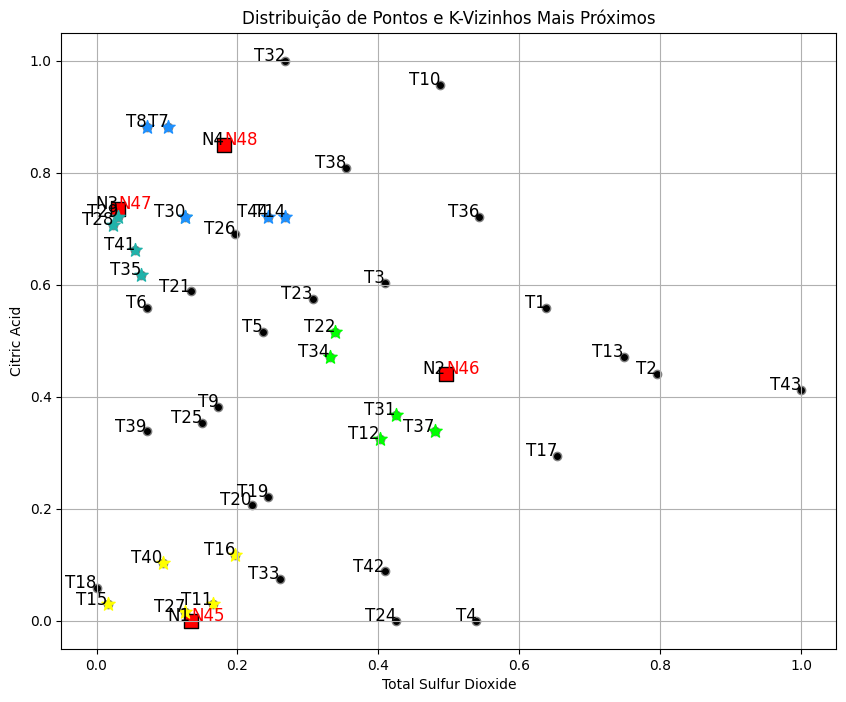

In [137]:
test_indices = [44, 45, 46, 47]

for results in predicted_2F:
    print(f"k = ",results.get('k'))
    scatter_plot(train_2F_Norm, test_2F_Norm, test_indices, results.get('indices_test'))
    print("\n")

<h3>As instâncias mais próximos são <b><b><h3>

In [138]:
predicted_11F[0].get('indices_test')

array([[15, 26, 18, 19, 14],
       [30,  4, 21, 18, 33],
       [25, 27,  6, 28, 40],
       [29,  0,  7,  6,  5]])

In [139]:
predicted_2F[0].get('indices_test')

array([[26, 10, 39, 14, 15],
       [30, 36, 11, 33, 21],
       [28, 27, 40, 29, 34],
       [ 6,  7, 29, 43, 13]])

<h3>classe prevista para N4 para o dataset 11F é <b>0</b> e para o dataset 2F é <b>1</b> em ambos os datasets<h3>

In [140]:
predicted_11F[0].get('predicted')[3]

0

In [141]:
predicted_2F[0].get('predicted')[3]

0